# Reconocimiento de sentimientos por imagen

## Preparación de los datos

### Limpieza de datos

Borramos la columna 'Usage' ya que no la necesitamos

In [ ]:
facial = facial.drop(columns=['Usage'])
facial

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


Elegimos las emociones que queremos usar, en este caso **feliz**, **triste** y **neutral**.

In [ ]:
final_emotion = [3,4,6]

In [ ]:
facial = facial[facial.emotion.isin(final_emotion)]
facial.shape

(21264, 2)

In [ ]:
mapeo = {3: 0, 4: 1, 6: 2}

facial.loc[:, 'emotion'] = facial['emotion'].replace(mapeo)

In [ ]:
facial

,emotion,pixels
3,1,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,2,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
6,1,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,0,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,0,85 84 90 121 101 102 133 153 153 169 177 189 1...
...,...,...
35877,2,139 143 145 154 159 168 176 181 190 191 195 19...
35878,0,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
35882,2,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,0,178 174 172 173 181 188 191 194 196 199 200 20...


In [ ]:
facial['emotion'].value_counts()

emotion
0    8989
2    6198
1    6077
Name: count, dtype: int64

### Elimincación duplicados

Vemos cuantas imágenes duplicadas hay

In [ ]:
duplicadas = facial[facial.duplicated(subset='pixels', keep=False)].count()
print("Filas duplicadas en 'pixels':")
print(duplicadas)

Filas duplicadas en 'pixels':
emotion    926
pixels     926
dtype: int64


In [ ]:
facial = facial.drop_duplicates(subset=['pixels'], keep='first')
facial

,emotion,pixels
3,1,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,2,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
6,1,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,0,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,0,85 84 90 121 101 102 133 153 153 169 177 189 1...
...,...,...
35877,2,139 143 145 154 159 168 176 181 190 191 195 19...
35878,0,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
35882,2,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,0,178 174 172 173 181 188 191 194 196 199 200 20...


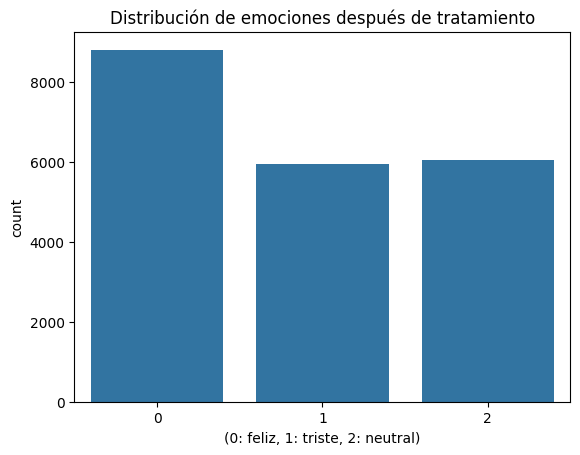

In [ ]:
sns.countplot(x='emotion', data=facial)
plt.title('Distribución de emociones después de tratamiento')
plt.xlabel('(0: feliz, 1: triste, 2: neutral)')
plt.show()

### Transformar datos

Definimos las funciones para transformar las emociones y las imágenes en array

In [ ]:
def transform(n):
    arr = [0] * 3
    if n == 0:
        arr[0] = 1
    else:
        arr[n] = 1
    return np.array(arr)

In [ ]:
def procImg(s):
    s=np.array([int(i) for i in s.split()]).reshape(48,48,1)
    return s

### Separamos la **y** y la **X**

In [ ]:
y = facial.iloc[:, 0].values
y = np.array([transform(i) for i in y])

In [ ]:
X=np.array([procImg(i) for i in facial.iloc[:,1].values])

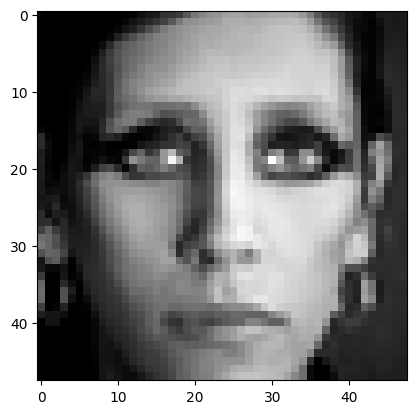

In [ ]:
plt.imshow(X[1], cmap="gray")
plt.show()

Imagen en la posición 1

### Redimensionar imágenes

In [ ]:
n=X.shape[0]
frac=int(n*0.8)
y.reshape((n,3,1))
x_train,x_test=X[:frac],X[frac:]
y_train,y_test=y[:frac],y[frac:]

### Etiquetado imágenes

In [ ]:
def emocion1(n):
    if n == 0:
        emocion1 = 'happiness'
    elif n == 1:
        emocion1 = 'sadness'
    elif n == 2:
        emocion1 = 'neutral'
    return emocion1